<a href="https://colab.research.google.com/github/manyasahay/Computer-Vision/blob/main/Harris_corner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless matplotlib


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [39]:
# Load the image
image_path = '/content/img2.jpg'  # Replace 'img.jpg' with the uploaded image filename
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [40]:
# Detect Harris corners
gray = np.float32(gray)  # Harris detector needs float32
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

In [41]:
# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)
img[dst > 0.05 * dst.max()] = [0, 0, 255]

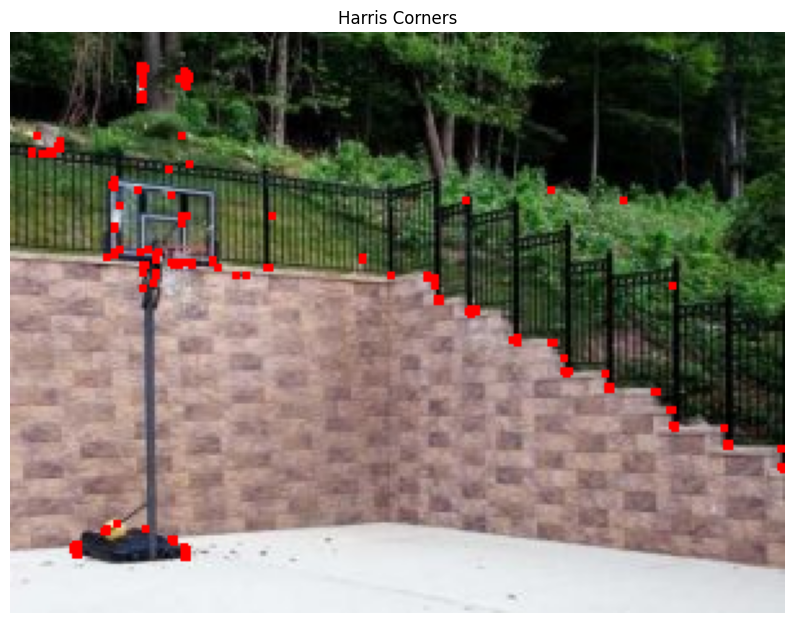

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.axis('off')
plt.show()

In [43]:
# Task 3: Rotate image and Reduce contrast
# Rotate the image by 45 degrees
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_img = cv2.warpAffine(img, M, (w, h))

In [44]:
# Reduce contrast by multiplying the pixel values by 0.5
low_contrast_img = cv2.convertScaleAbs(img, alpha=0.5, beta=0)

In [45]:
# Detect Harris corners in the rotated image
gray_rotated = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)
gray_rotated_float = np.float32(gray_rotated)
dst_rotated = cv2.cornerHarris(gray_rotated_float, 2, 3, 0.04)
dst_rotated = cv2.dilate(dst_rotated, None)
rotated_img[dst_rotated > 0.05 * dst_rotated.max()] = [0, 0, 255]

In [46]:
# Detect Harris corners in the low-contrast image
gray_low_contrast = cv2.cvtColor(low_contrast_img, cv2.COLOR_BGR2GRAY)
gray_low_contrast_float = np.float32(gray_low_contrast)
dst_low_contrast = cv2.cornerHarris(gray_low_contrast_float, 2, 3, 0.04)
dst_low_contrast = cv2.dilate(dst_low_contrast, None)
low_contrast_img[dst_low_contrast > 0.05 * dst_low_contrast.max()] = [0, 0, 255]

In [47]:
corners_original = np.sum(dst > 0.05 * dst.max())
corners_rotated = np.sum(dst_rotated > 0.05 * dst_rotated.max())
corners_low_contrast = np.sum(dst_low_contrast > 0.05 * dst_low_contrast.max())

print(f"Number of corners in original image: {corners_original}")
print(f"Number of corners in rotated image: {corners_rotated}")
print(f"Number of corners in low contrast image: {corners_low_contrast}")


Number of corners in original image: 900
Number of corners in rotated image: 122
Number of corners in low contrast image: 771


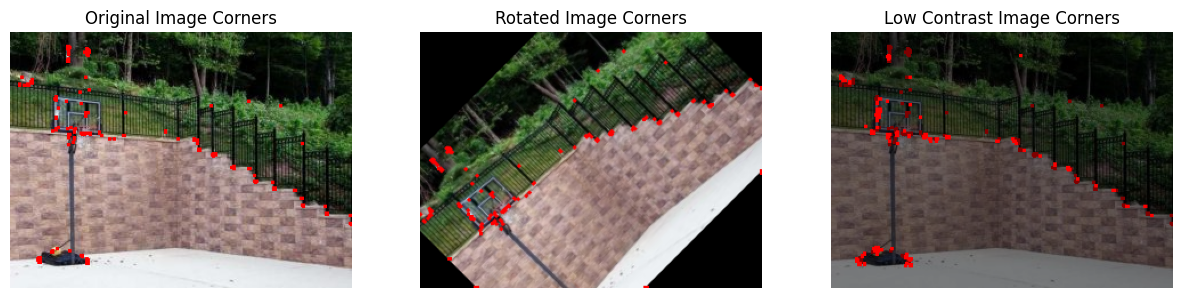

In [50]:
# Display the images with corners
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image Corners')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image Corners')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(low_contrast_img, cv2.COLOR_BGR2RGB))
plt.title('Low Contrast Image Corners')
plt.axis('off')

plt.show()

Harris corner detector is used to identify corners in the image, the threshold used is 0.05*max value of corner point.

If the image is rotated, harris corner detector shows the same corner in the rotated image (invariant to rotation).
If contrast of the image is increased then, more corner points appear if threshold is kept at the same value (0.05).
If contrast is decreased, corner points are lesser as the points go below the threshold.

Harris corner detector is variant to contrast.